This notebook is designed for the lecture on heat and mass transport phenomena (29.10.2020)

As you will see, this notebook consists of three parts:


In [46]:
# Get Measured Data
# In this cell, the data points from the experiment are stored
# Please don't change anything and run this cell once
realT = np.linspace(T_l,T_r,N)


In [42]:
# Parameter definition

# Define a value for Alpha here :
###################################################################################################################

alpha = 2 # [W/m²K]

###################################################################################################################


In [43]:
# this cell is used to define the partial differential equation
# you don't need to change anything here, just run it once

import numpy as np
import pandas as pd

### Stick-Dimension ###
N = 100 # Resolution
w = 0.5 #[m] Width
dx = w/(N-1) # finite length

### Initilization ###
T = np.ones(N);

### boundary condition ###
T_l =  350 # left temperature
T_r =  200# right temperature
T[0] = T_l
T[N-1] = T_r

### Finite Differences Method ### 
A = np.zeros([N-2,N-2]) # left side of equation    
z = alpha/(dx**2) # help variable
A[0,0] = -2/z
A[0,1] = z

A[N-3,N-4] = z
A[N-3,N-3] = -2*z

for k in range(1,N-3):        
    A[k,k-1] = z
    A[k,k] = -2*z
    A[k,k+1] = z
      
b = np.zeros(N-2) # right side
b[0] = -T_l*z 
b[N-3] = T_r*z 

Tinner = np.linalg.solve(A,-b) #solution     

T[1:N-1] = Tinner


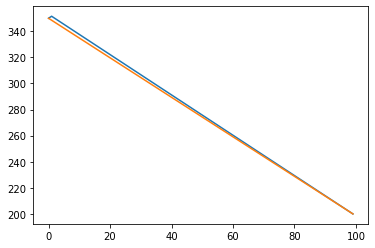

In [47]:
import matplotlib.pyplot as plt

plt.plot(T)
plt.plot(realT)

In [54]:
# Result
# You will get your result when executing this cell. The result is the mean squared error, so the squarred error between the model's 
# predicted values and the measured values

#please fill out the google form with your alpha value and the obtained result 

# MSE:
mse = (np.square(T - realT)).mean(axis=0)
mse

3.1088869549758824